In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df  = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/spam.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [3]:
df.isnull().sum()

,0
label,0
message,0
length,0
punct,0


In [4]:
df.shape

(5572, 4)

In [5]:
df['label'].value_counts()

,count
label,
ham,4825
spam,747


##Dataset Balancing

In [6]:
ham = df[df['label']=='ham']
ham.shape

(4825, 4)

In [7]:
spam = df[df['label']=='spam']
spam.shape

(747, 4)

In [8]:
ham = ham.sample(spam.shape[0])

In [9]:
ham.shape

(747, 4)

In [10]:
data = pd.concat([ham, spam], axis=0, ignore_index=True)

In [11]:
data.shape

(1494, 4)

In [12]:
data.sample(5)

,label,message,length,punct
147,ham,Oh wow thats gay. Will firmware update help,43,1
641,ham,I've sent my wife your text. After we buy them...,123,6
158,ham,Then cant get da laptop? My matric card wif ü ...,53,4
923,spam,1000's of girls many local 2 u who r virgins 2...,139,8
284,ham,Please dont say like that. Hi hi hi,35,1


##Exploratory Data Analysis

In [13]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = (10, 4)
plt.style.use('ggplot')

In [14]:
ham.columns

Index(['label', 'message', 'length', 'punct'], dtype='object')

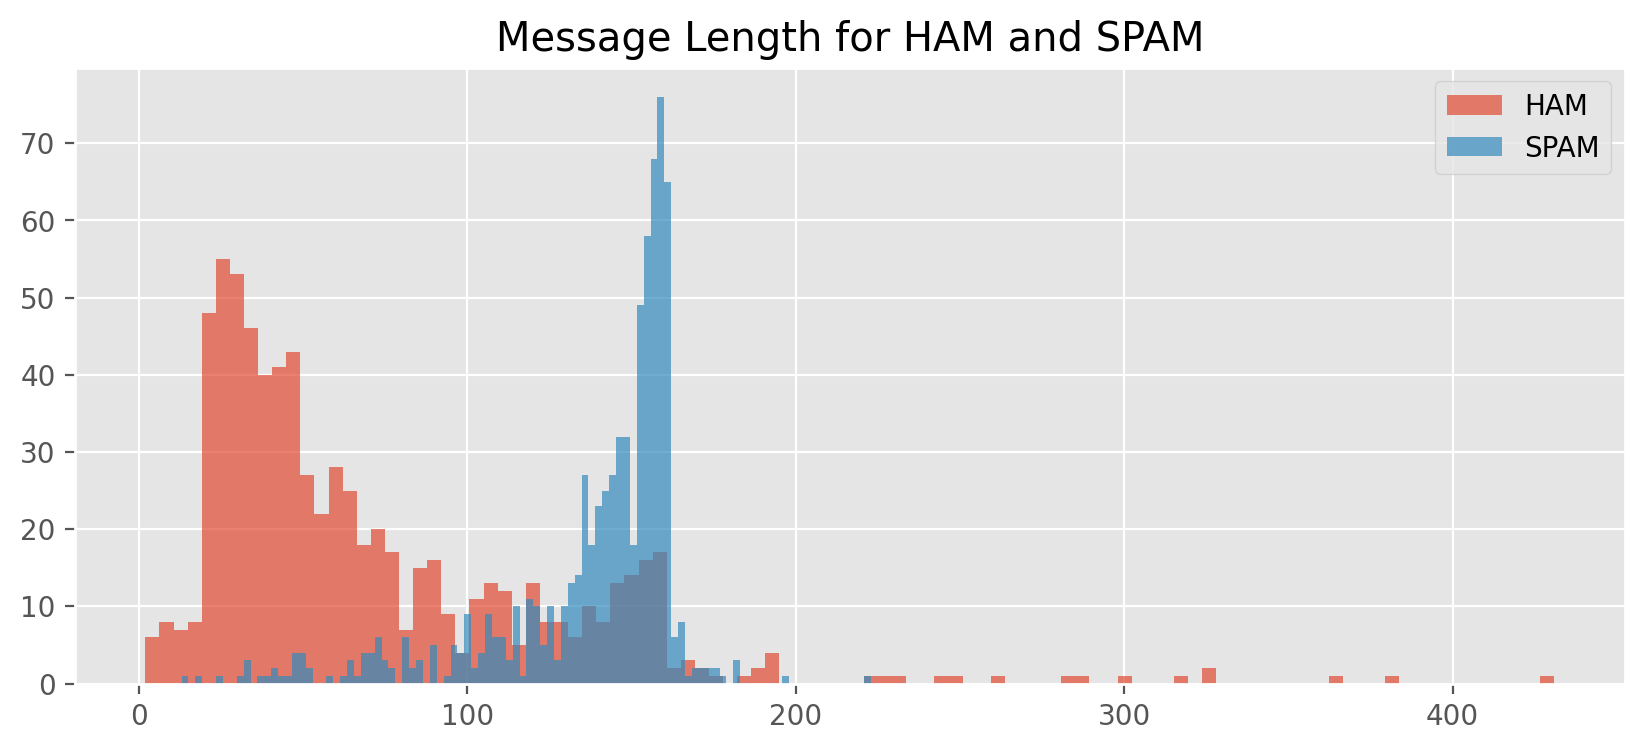

In [15]:
plt.hist(ham['length'], bins=100, alpha=0.7, label='HAM')
plt.hist(spam['length'], bins=100, alpha=0.7, label='SPAM')
plt.title('Message Length for HAM and SPAM')
plt.legend()
plt.show()

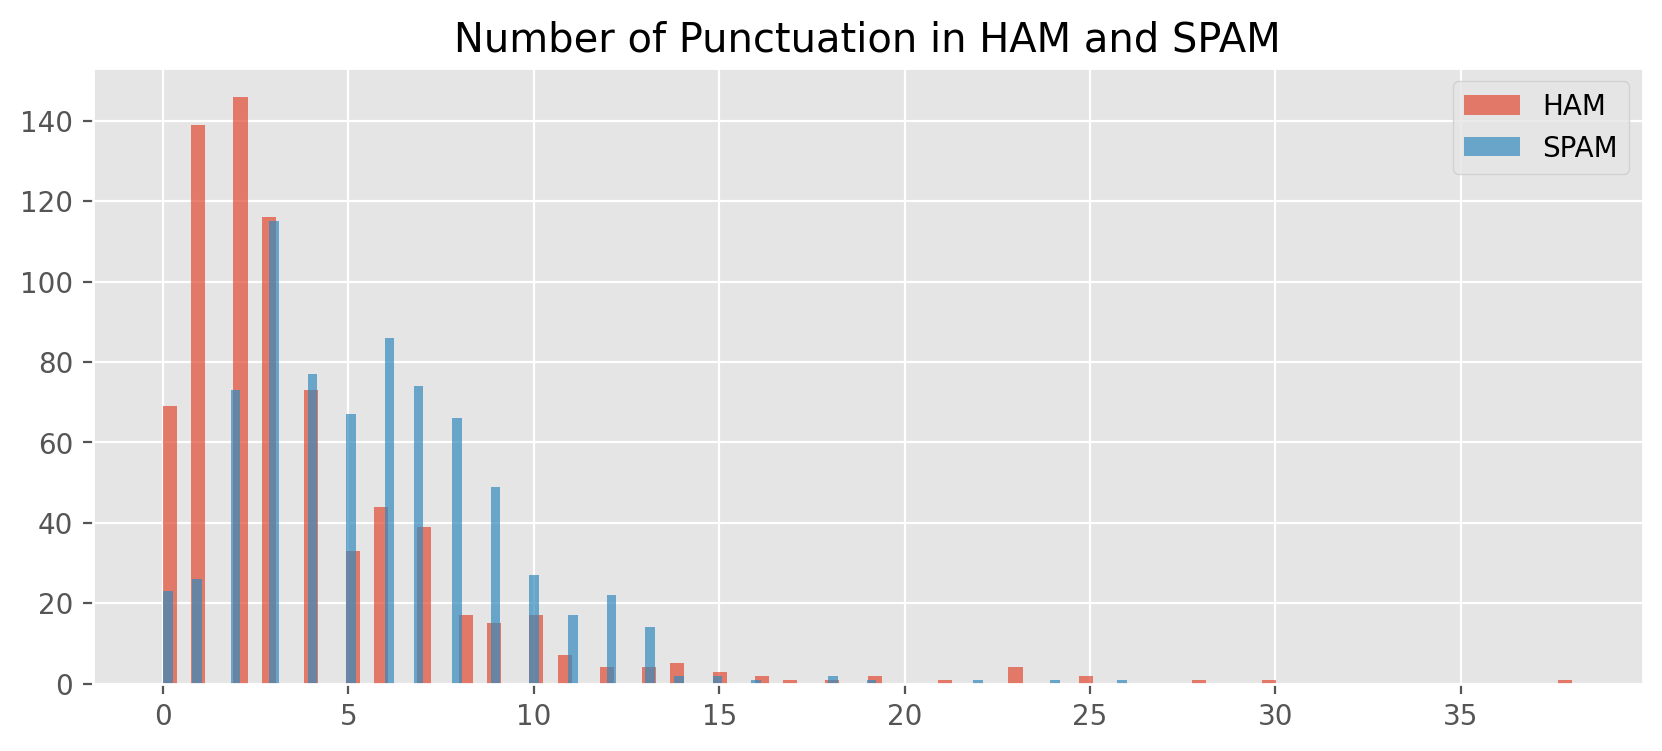

In [16]:
plt.hist(ham['punct'], bins=100, alpha=0.7, label='HAM')
plt.hist(spam['punct'], bins=100, alpha=0.7, label='SPAM')
plt.title('Number of Punctuation in HAM and SPAM')
plt.legend()
plt.show()

##Data Preparation for Training

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=0, shuffle=True, stratify=data['label'])

X_train.shape, X_test.shape

((1195,), (299,))

In [19]:
# model Building
clf = Pipeline([('tfidf', TfidfVectorizer()), ('nb', MultinomialNB())])

clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('nb', MultinomialNB())])

In [20]:
y_pred = clf.predict(X_test)

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.92      0.96      0.94       150
        spam       0.96      0.92      0.94       149

    accuracy                           0.94       299
   macro avg       0.94      0.94      0.94       299
weighted avg       0.94      0.94      0.94       299



In [22]:
clf.predict(['you have won lottery ticket worth $1000, please click here to claim',
            'hi, how are you doing today?'])

array(['spam', 'ham'], dtype='<U4')

In [23]:
clf.classes_

array(['ham', 'spam'], dtype='<U4')

##Save and Load Model

In [24]:
import pickle

pickle.dump(clf, open('model.pkl', 'wb'))

In [25]:
model = pickle.load(open('model.pkl', 'rb'))

In [26]:
model.predict(['you have won lottery ticket worth $1000, please click here to claim',
            'hi, how are you doing today?'])

array(['spam', 'ham'], dtype='<U4')